In [1]:
import pandas as pd 
import numpy as np
from functools import partial, reduce
import glob 
import os
import itertools as it
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter



In [2]:
path = "data"

all_files = glob.glob(os.path.join(path, "*.csv"))

df_list = []

print(f"Processing {len(all_files)} repos data:\n")

for f in all_files:
    path_list = f.split("\\")
    f_name = path_list[-1]
    f_name2 = f_name.split("stargazers_")[1]
    repo_name = f_name2.split(".csv")[0] 
    print(repo_name) 
    df_from_file = pd.read_csv(f)
    df_from_file['repo_name'] = repo_name
    df_list.append(df_from_file)



df_concat = pd.concat(df_list, ignore_index=True)



Processing 111 repos data:

aapanel
BlackCatCMS
bludit
BugReport
cabot
cJSON
Codiad
contiki-ng
cryptacular
CSS-injection-in-Swagger-UI
CVE-2020-11579
CVE-2020-25270
CVE-2020-25272
CVE-2020-25273
CVE-2020-25487
cve-pocs
CVEnotes
CVEs
devise
Disclosures
dotplant2
envoy
FA
Fluid
fosite
FreeRDP
GetSimpleCMS
glpi
godot
gog_galaxy_client_service_poc
goxmldsig
gpac
grocy
halo
hapi-fhir
harbor
HFish
http
icingaweb2
illumos-gate
ImageMagick
impresscms
inspircd
jackson-databind
jackson-modules-java8
jasper
jerryscript
json
kubernetes
libarchive
libexpat
libgd
libjpeg-turbo
libproxy
LibRaw
libssh2
linux
LuaJIT
md4c
metasploit-framework
MilkyTracker
Miscellaneous
mobile-android
mojarra
mumble
nacos
Navigate-CMS
netty
nfdump
njs
node-oauth2-server
oauth-ruby
openeclass
openjpeg
optionsbleed
osquery
ovs
peg-markdown
PHP-Fusion
PHPMailer
pip
pluck
PluXml
poc-yaws-cgi-shell-injection
pocs
radare2
rails
RAU_crypto
routeros
routinator
rust
safe-eval
silk-v3-decoder
simpl-schema
sized-chunks
soycms
Syliu

In [3]:
df_concat.to_csv("all_data_concatenated.csv")

In [4]:
with open("all_data_concatenated.csv", encoding = "utf-8" ) as f:
    df_concat = pd.read_csv(f)


In [5]:
df_concat

,Unnamed: 0,username,name,numberOfReposStarred,repo_name
0,0,AnthonyH45,UCR,1954,aapanel
1,1,webbird,NaN,61,BlackCatCMS
2,2,schoensee,NaN,1,BlackCatCMS
3,3,marc-sauerwald,NaN,11,BlackCatCMS
4,4,digitalbricks,Germany,5,BlackCatCMS
...,...,...,...,...,...
296342,296342,ayllon,Geneva,16,zziplib
296343,296343,jjhartmann,"Waterloo, ON",195,zziplib
296344,296344,Huangguoju,NaN,21,zziplib
296345,296345,bing2008,NaN,674,zziplib


In [6]:
counter = Counter()

In [7]:
usernames = df_concat["username"]

usernames

0             AnthonyH45
1                webbird
2              schoensee
3         marc-sauerwald
4          digitalbricks
               ...      
296342            ayllon
296343        jjhartmann
296344        Huangguoju
296345          bing2008
296346             mb720
Name: username, Length: 296347, dtype: object

In [8]:
for username in usernames:
    counter[username] += 1

In [9]:
counter.most_common(3)

[('denji', 42), ('vulcangz', 38), ('angusshire', 34)]

In [10]:
counter_dict = dict(counter)

hist_dict = Counter(counter_dict.values())


In [11]:
hist_values = counter_dict.values()
print(set(hist_values))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 32, 34, 38, 42}


In [12]:
filtered_values = list(filter(lambda a : a >= 10, hist_values))
print(filtered_values)

[18, 12, 16, 12, 30, 10, 13, 38, 10, 10, 11, 17, 13, 11, 11, 19, 16, 10, 10, 13, 22, 11, 10, 26, 10, 13, 10, 13, 10, 10, 11, 23, 10, 10, 10, 26, 11, 10, 12, 15, 20, 10, 12, 15, 12, 11, 10, 13, 15, 13, 12, 10, 12, 11, 16, 17, 10, 11, 13, 15, 14, 10, 15, 10, 22, 12, 10, 10, 16, 10, 13, 10, 16, 17, 11, 10, 10, 10, 22, 11, 34, 12, 10, 13, 17, 10, 10, 12, 10, 11, 11, 13, 18, 11, 10, 10, 15, 10, 42, 10, 12, 10, 14, 12, 20, 10, 11, 11, 16, 12, 13, 19, 10, 14, 14, 12, 14, 14, 13, 13, 12, 12, 21, 13, 13, 12, 14, 11, 16, 17, 10, 18, 15, 10, 12, 10, 32, 10, 10, 11, 10, 10, 16, 12, 10, 12, 10, 13, 14, 34, 10, 12, 16, 13, 25, 10, 18, 16, 15, 11, 11, 15, 10, 10, 19, 15, 10, 11, 12, 15, 12, 12, 10, 15, 26, 16, 12, 11, 15, 11, 10, 12, 13, 11, 14, 23, 21, 10, 10, 17, 12, 15, 18, 10, 12, 13, 10, 14, 11, 20, 10, 13, 10, 14, 12, 10, 14, 10, 11, 13, 25, 18, 11, 11, 14, 11, 10, 13, 19, 15, 11, 10, 10, 10, 13, 24, 18, 27, 18, 14, 10, 18, 10, 26, 17, 10, 11, 10, 12, 14, 11, 20, 10, 13, 19, 14, 12, 11, 14, 12,

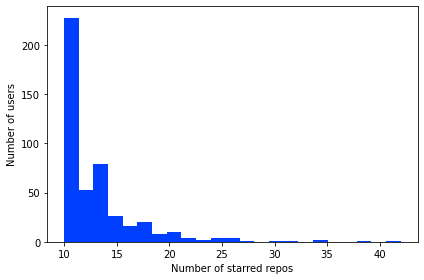

In [18]:
plt.hist(filtered_values, bins = len(set(filtered_values)), align = "mid")
plt.style.use("seaborn-bright")
plt.xlabel("Number of starred repos")
plt.ylabel("Number of users")
plt.tight_layout()
plt.savefig("Histogram.png", format = "png", dpi = 200)
plt.show()


In [14]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
